In [1]:
import numpy as np
import networkx as nx
import math
import random
import os 
import matplotlib.pyplot as plt
import pandas as pd


## Question 1

In [2]:
#defining a 1D network with the rule A(i,j) = 1/r^c for  given n and c such that r = |i - j|
def create_graph(n, c, network_type="chain"):
    assert(network_type in ["chain", "ring"])
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i == j:
                A[i][j] = 0
            else:
                if network_type == "chain":
                    A[i][j] = 1 / (abs(i - j) ** c)
                else:
                    A[i][j] = 1 / (min(abs(i - j), n - abs(i - j)) ** c)
            assert(A[i][j] >= 0.0)
    return A

def compute_degrees(graph):

    return np.sum(graph,axis=0)

# Compute the average degree of the any adjacency matrix
def compute_average_degree(graph):

    # print(np.sum(graph))
    return np.sum(graph) / len(graph)
    
    

### Part a
Plot average degree vs. c for nodes $N=500$ and $N=1000$

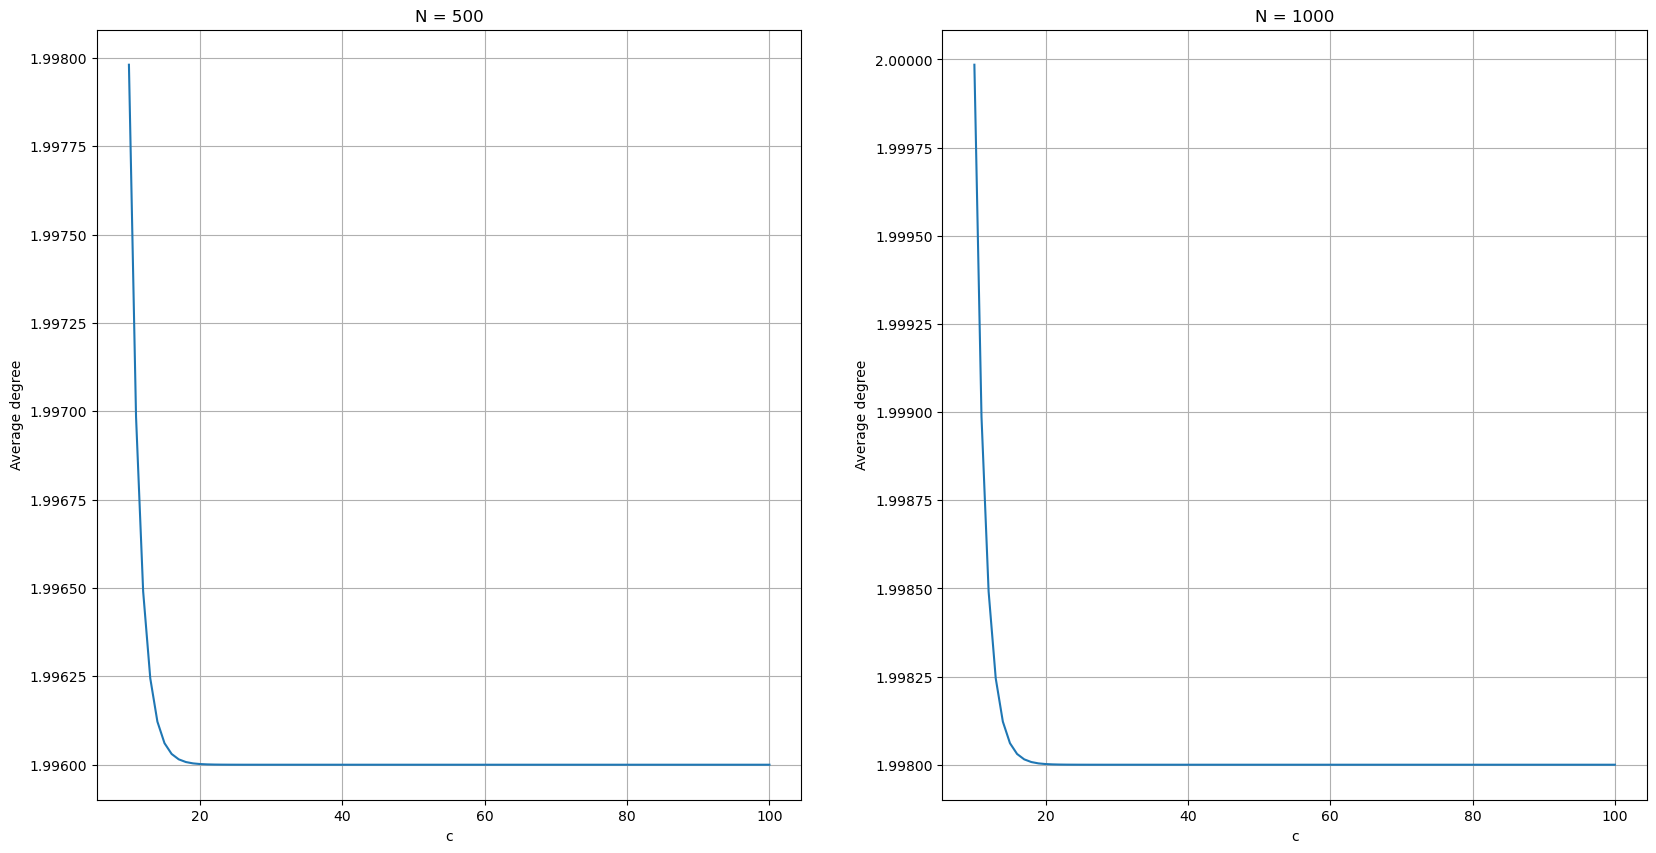

In [3]:
# Question
def avg_deg_c(network_type = "chain"):
    fig, axs = plt.subplots(1, 2, figsize=(20, 10))
    for i, n in enumerate([500, 1000]):
        max_c = 100
        avg_degs = []
        c_range = list(range(10, max_c + 1))
        for c in c_range:
            g = create_graph(n, c, network_type)
            avg_degs.append(compute_average_degree(g))
        axs[i].grid()
        axs[i].plot(c_range, avg_degs)
        axs[i].set_ylabel("Average degree")
        axs[i].set_xlabel("c")
        axs[i].set_title(f"N = {n}")

avg_deg_c("chain")


### Part b
Plot the average degree vs N for c = 1 and c = 2

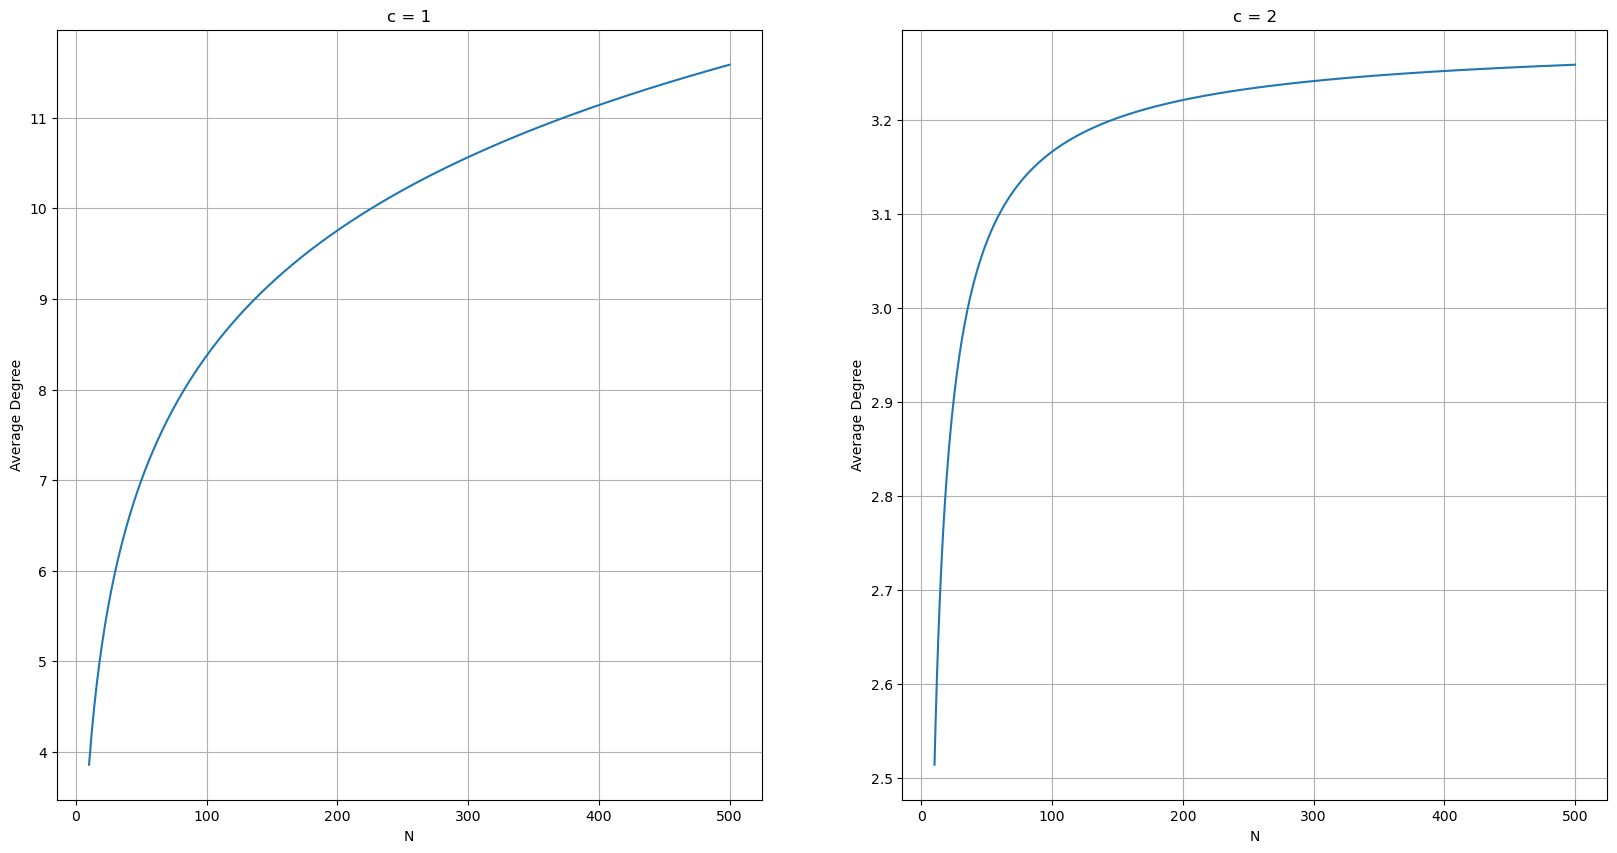

In [4]:

def avg_deg_n(network_type = "chain"):
    fig, axs = plt.subplots(1, 2, figsize=(20, 10))
    for i, c in enumerate([1, 2]):
        avg_degs = []
        max_N = 500
        n_range = list(range(10, max_N + 1))
        for n in n_range:
            g = create_graph(n, c, network_type)
            avg_degs.append(compute_average_degree(g))
        axs[i].plot(n_range, avg_degs)
        axs[i].grid()
        axs[i].set_ylabel("Average Degree")
        axs[i].set_xlabel("N")
        axs[i].set_title(f"c = {c}")

avg_deg_n("chain")

### Part c
Plot a histogram of the degree for N = 1000 and c = 2

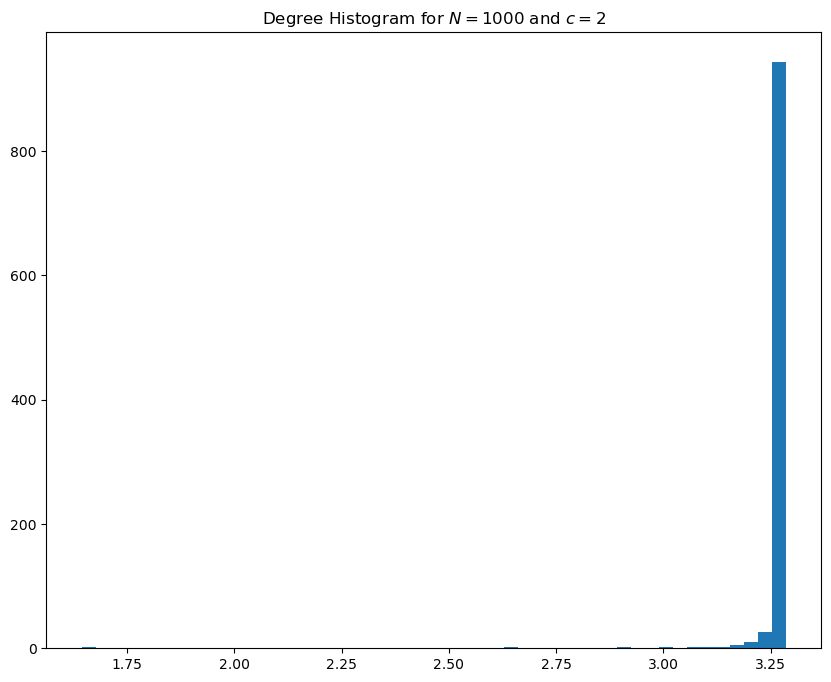

In [5]:
def deg_hist(network_type = "chain", n_bins = 50):
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    g = create_graph(n=1000, c=2, network_type=network_type)
    ax.hist(compute_degrees(g), bins=n_bins)
    ax.set_title("Degree Histogram for $N = 1000$ and $c = 2$")

deg_hist("chain")

### Part d
Repeat the above but with a ring network. We observe that in a ring network, all the nodes have the same degree.

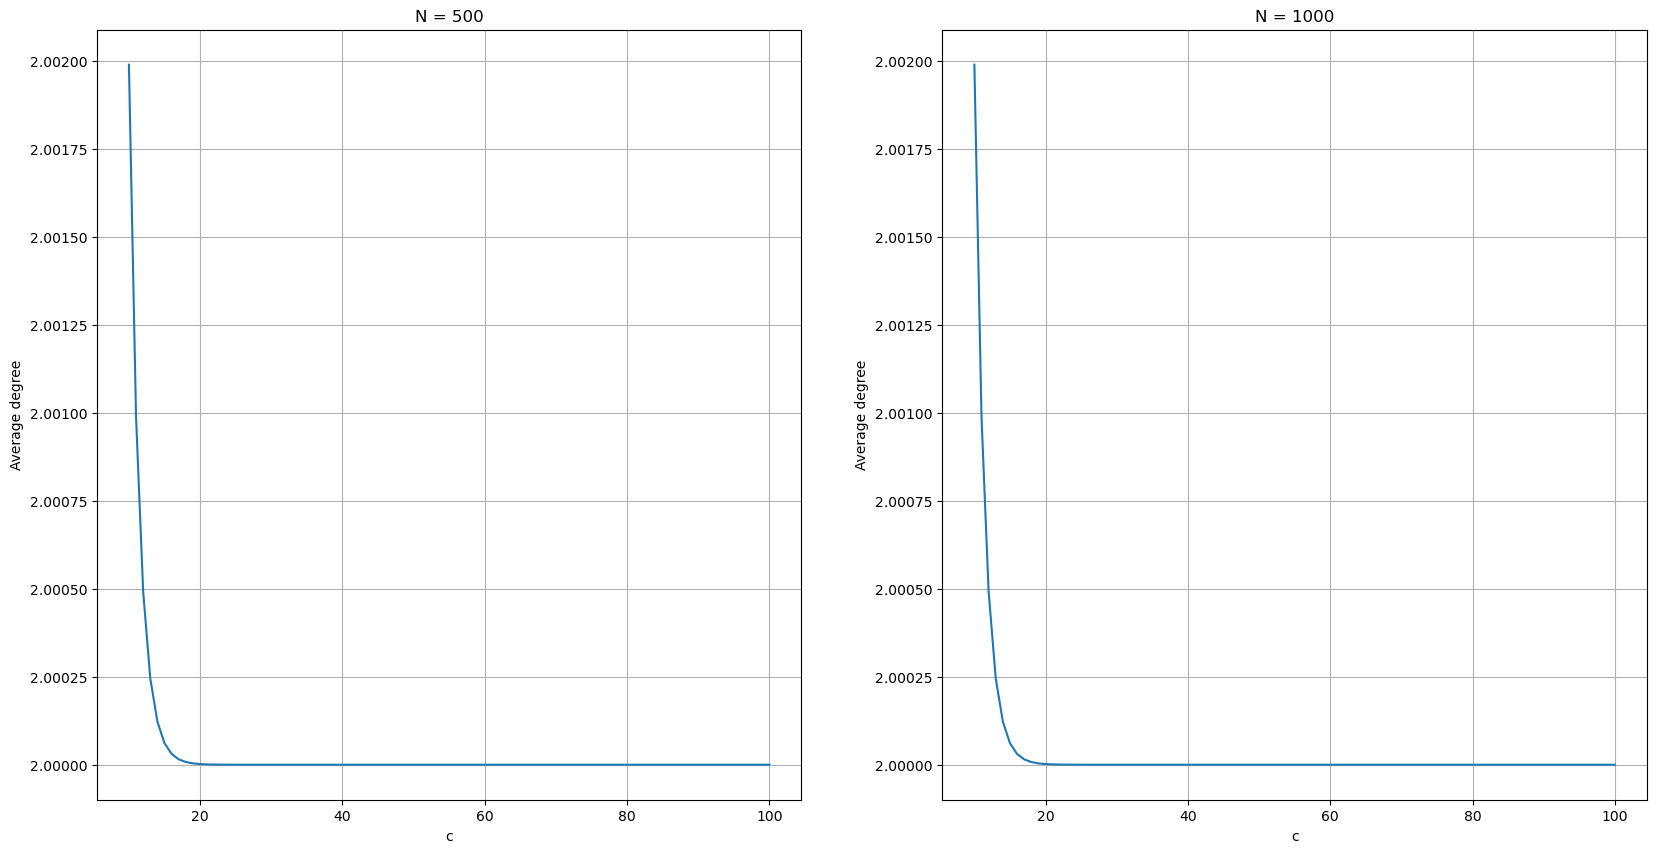

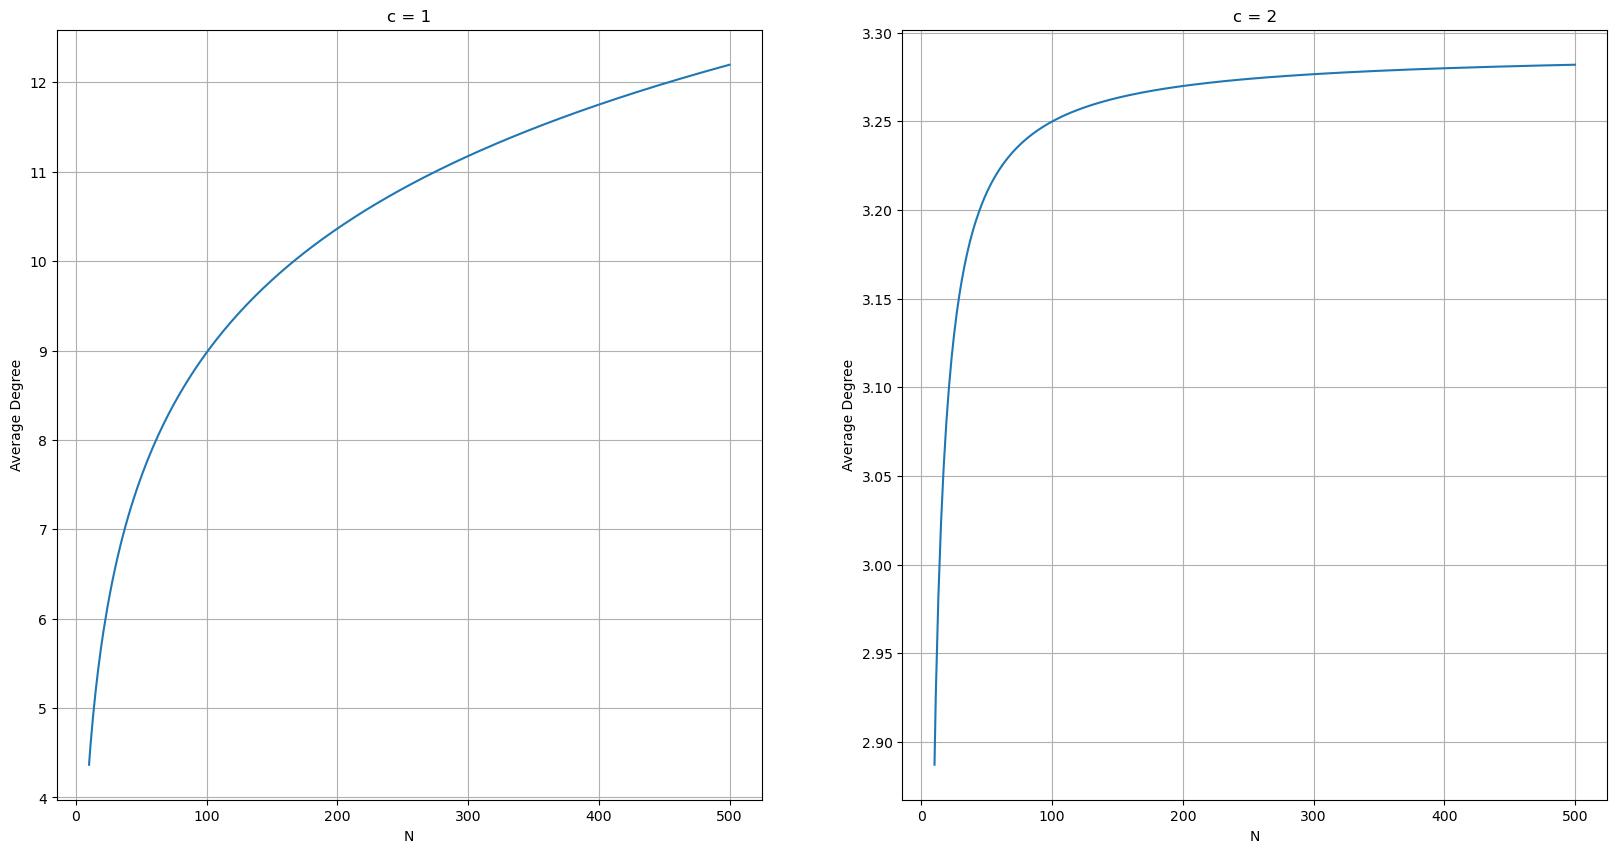

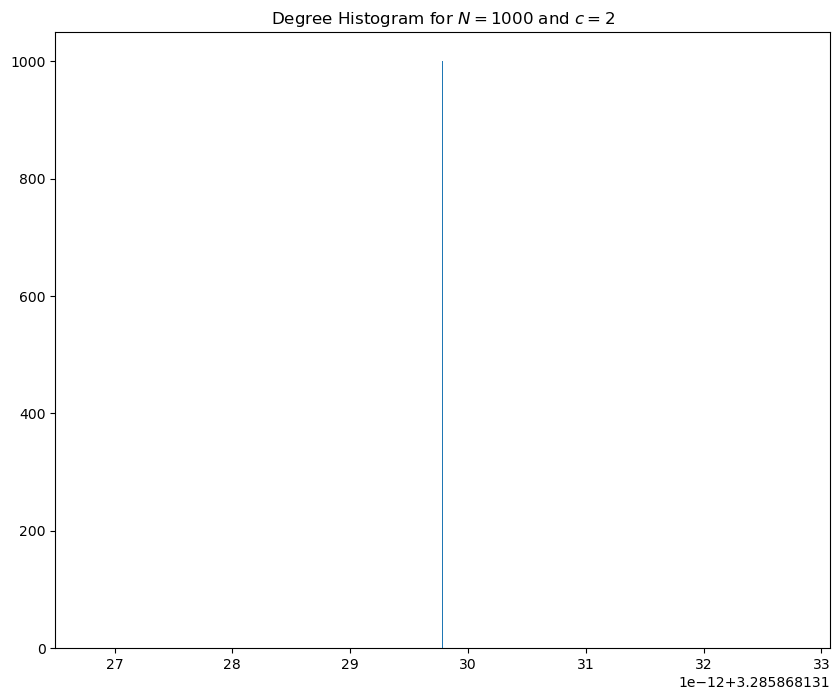

In [6]:
avg_deg_c("ring")
avg_deg_n("ring")
deg_hist("ring", n_bins=1)

## Question 2


In [80]:
def generate_graph(N, threshold = 0.5):
    """
    returns the Adjacency matrix with the rules stated in the question
    """
    Adj = np.zeros((N,N),np.int32)
    for i in range(N):
        for j in range(i,N):
            if i == j:
                Adj[i,j] = 0
            else:
                p = np.random.uniform(0,1)
                if p >= threshold:
                    Adj[i,j] = 1
                    Adj[j,i] = 1
    return Adj

def compute_average_degree(Adj):
    """ returns first order and second order average degree """
    degrees = Adj.sum(axis = 1)
    average_degree = degrees.sum() / degrees.shape[0]
    second_order_average_degree  = (degrees ** 2).sum() / degrees.shape[0]
    return average_degree,second_order_average_degree

def generate_data_for_range(start_n = 10, end_n = 1000):
    """ returns the list of second order and first order average degree """
    average_degrees = []
    second_order_average_degrees = []
    second_smallest_eigenvalues = []
    for i in range(start_n, end_n + 1):
        graph = generate_graph(i)
        average_degree, second_order_average_degree = compute_average_degree(graph)
        second_smallest_eigenvalue = compute_second_smallest_eigenvalues(graph)
        second_smallest_eigenvalues.append(second_smallest_eigenvalue)
        average_degrees.append(average_degree)
        second_order_average_degrees.append(second_order_average_degree)
        
        if i % 50 == 0:
            print("N = {0} done".format(i))
    return average_degrees,second_order_average_degrees,second_smallest_eigenvalues

def create_laplacian_matrix_from_adjacency_matrix(adj):
    """ returns the laplacian matrix of a simple graph given by L = D - A 
        where D is the degree matrix and adjacency matrix is A """
    
    laplacian = np.zeros(adj.shape)
    degree = np.zeros(adj.shape)
    N = adj.shape[0]
    for i in range(N):
        degree[i,i] = adj[i].sum()
        
    laplacian = degree - adj
    #print(degree)
    #print("")
    #print(laplacian)
    return laplacian

def compute_second_smallest_eigenvalues(adj_matrix):
    laplacian_matrix = create_laplacian_matrix_from_adjacency_matrix(adj_matrix)
    w,v = np.linalg.eig(laplacian_matrix)
    w = sorted(set(w))
    return w[1]    

In [81]:
## test laplacian 
adj = np.array([
    [0,1,0,0,1,0],
    [1,0,1,0,1,0],
    [0,1,0,1,0,0],
    [0,0,1,0,1,1],
    [1,1,0,1,0,0],
    [0,0,0,1,0,0]])
l = create_laplacian_matrix_from_adjacency_matrix(adj)


    
    

In [82]:
start_n = 10
end_n = 1000
X = [i for i in range(start_n,end_n+1)]
average_degrees , second_order_average_degrees,second_smallest_eigenvalues = generate_data_for_range(start_n, end_n)


N = 50 done
N = 100 done
N = 150 done
N = 200 done
N = 250 done
N = 300 done
N = 350 done
N = 400 done
N = 450 done
N = 500 done
N = 550 done
N = 600 done
N = 650 done
N = 700 done
N = 750 done
N = 800 done
N = 850 done
N = 900 done
N = 950 done
N = 1000 done


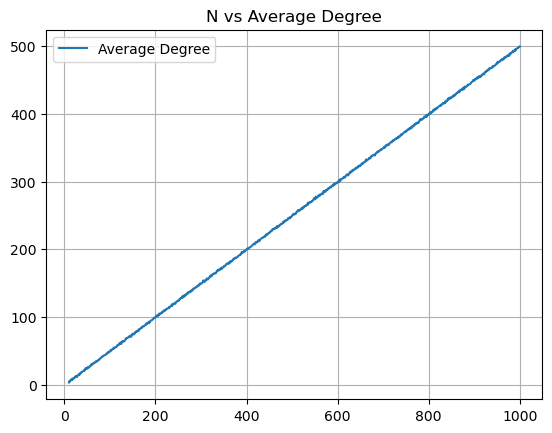

In [84]:
plt.plot(X,average_degrees,label = "Average Degree")
plt.title("N vs Average Degree")
plt.legend()
plt.grid()

plt.show()



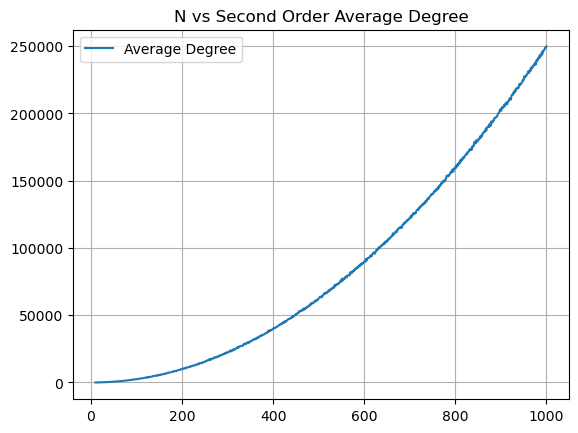

In [85]:
plt.plot(X,second_order_average_degrees,label = "Average Degree")
plt.title("N vs Second Order Average Degree")
plt.legend()
plt.grid()
plt.show()


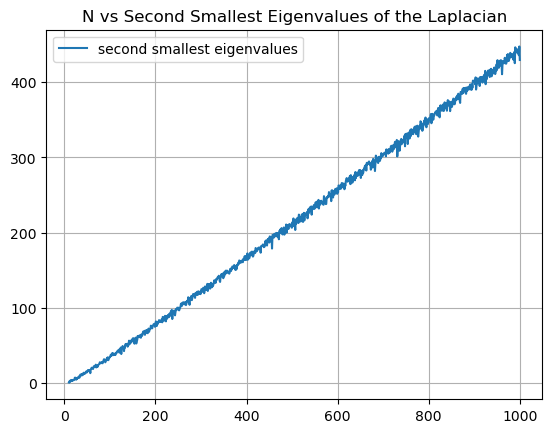

In [86]:
plt.plot(X,second_smallest_eigenvalues,label = "second smallest eigenvalues")
plt.title("N vs Second Smallest Eigenvalues of the Laplacian")
plt.legend()
plt.grid()
plt.show()


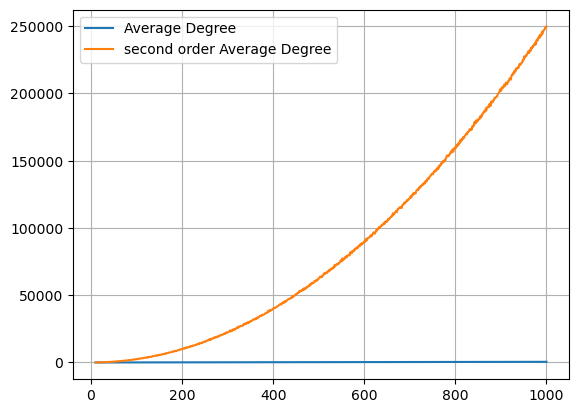

In [87]:
#X.append(1000)
plt.plot(X,average_degrees,label = "Average Degree")
plt.plot(X,second_order_average_degrees,label = "second order Average Degree")
plt.grid()
plt.legend()
plt.show()

## Question 3

Node Degree
0 16
1 9
2 10
3 6
4 3
5 4
6 4
7 4
8 5
9 2
10 3
11 1
12 2
13 5
14 2
15 2
16 2
17 2
18 2
19 3
20 2
21 2
22 2
23 5
24 3
25 3
26 2
27 4
28 3
29 4
30 4
31 6
32 12
33 17


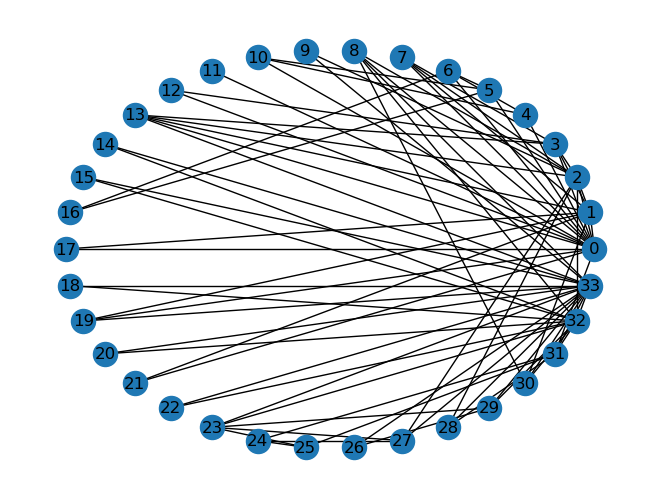

In [15]:
G = nx.karate_club_graph()
print("Node Degree")
for v in G:
    print(f"{v} {G.degree(v)}")

nx.draw_circular(G, with_labels=True)
plt.show()

In [16]:
def compute_centralities(G):
    """ given a networkx graph, compute 
        degree centrality(degree) ,
        normalized_degree_centrality,
        closeness centrality,
        eigenvector centrality,
        node betweenness,
        
        """
    degree_centrality = G.degree
    normalized_degree_centrality = nx.degree_centrality(G)
    eigenvector_centrality = nx.eigenvector_centrality(G)
    closeness_centrality = nx.closeness_centrality(G,wf_improved = False)
    betweenness_centrality = nx.betweenness_centrality(G)
    
    return degree_centrality, normalized_degree_centrality , closeness_centrality , eigenvector_centrality, betweenness_centrality

degree_centrality, normalized_degree_centrality , closeness_centrality , eigenvector_centrality, betweenness_centrality = compute_centralities(G)

        
        

In [17]:
centralities = []
nodes = []
for i in G.nodes:
    nodes.append(i)
    centrality = [degree_centrality[i], normalized_degree_centrality[i] , closeness_centrality[i] , eigenvector_centrality[i], betweenness_centrality[i]]
    centralities.append(centrality)
centralities = np.array(centralities)
nodes = np.array(nodes)


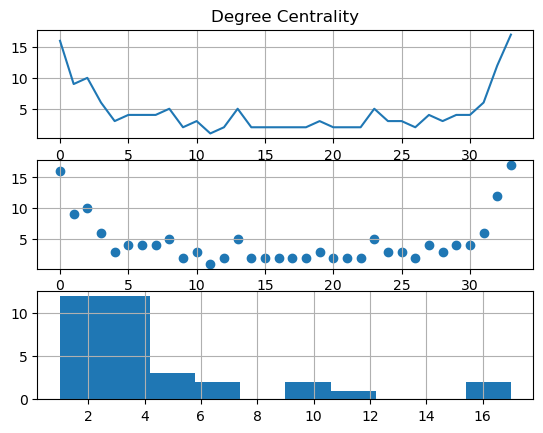

In [69]:
figure, axis = plt.subplots(3, 1)

axis[0].plot(nodes,centralities[:,0])
#axis[0].set_title("degree centralty as plot")
axis[1].scatter(nodes, centralities[:,0])
#axis[1].set_title("degree centralty as scatter plot")
axis[2].hist(centralities[:,0])
axis[0].set_title("Degree Centrality")
axis[0].grid()
axis[1].grid()
axis[2].grid()
#axis[1].set_title("degree centralty as histogram")
plt.show()

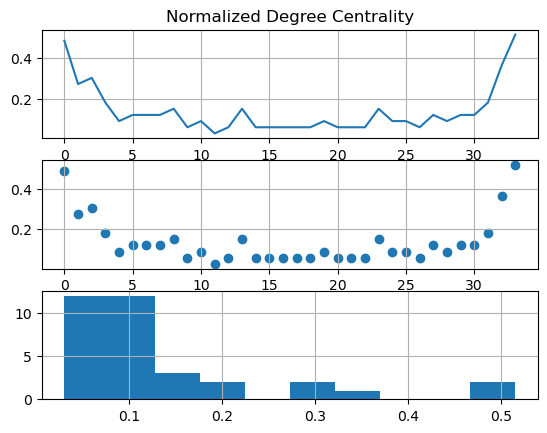

In [68]:
figure, axis = plt.subplots(3, 1)

axis[0].plot(nodes,centralities[:,1])
#axis[0].set_title("degree centralty as plot")
axis[1].scatter(nodes, centralities[:,1])
#axis[1].set_title("degree centralty as scatter plot")
axis[2].hist(centralities[:,1])
axis[0].set_title("Normalized Degree Centrality")
axis[0].grid()
axis[1].grid()
axis[2].grid()
#axis[1].set_title("degree centralty as histogram")
plt.show()

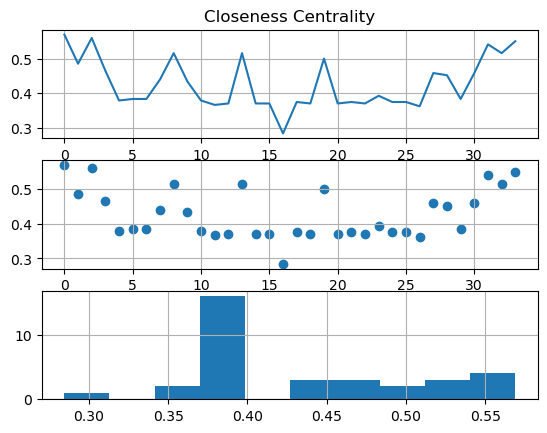

In [67]:
figure, axis = plt.subplots(3, 1)

axis[0].plot(nodes,centralities[:,2])
#axis[0].set_title("degree centralty as plot")
axis[1].scatter(nodes, centralities[:,2])
#axis[1].set_title("degree centralty as scatter plot")
axis[2].hist(centralities[:,2])
axis[0].set_title("Closeness Centrality")
axis[0].grid()
axis[1].grid()
axis[2].grid()
#axis[1].set_title("degree centralty as histogram")
plt.show()

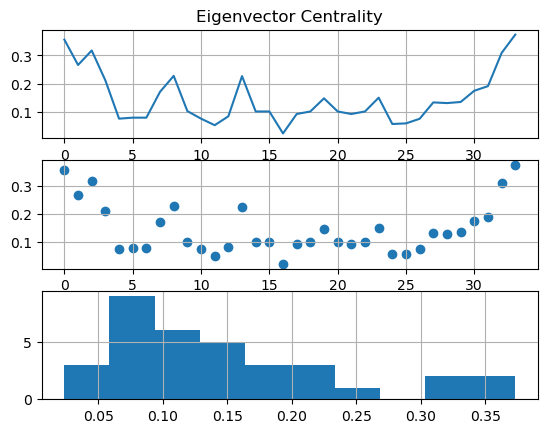

In [66]:
figure, axis = plt.subplots(3, 1)

axis[0].plot(nodes,centralities[:,3])
#axis[0].set_title("degree centralty as plot")
axis[1].scatter(nodes, centralities[:,3])
#axis[1].set_title("degree centralty as scatter plot")
axis[2].hist(centralities[:,3])
axis[0].set_title("Eigenvector Centrality")
axis[0].grid()
axis[1].grid()
axis[2].grid()

#axis[1].set_title("degree centralty as histogram")
plt.show()

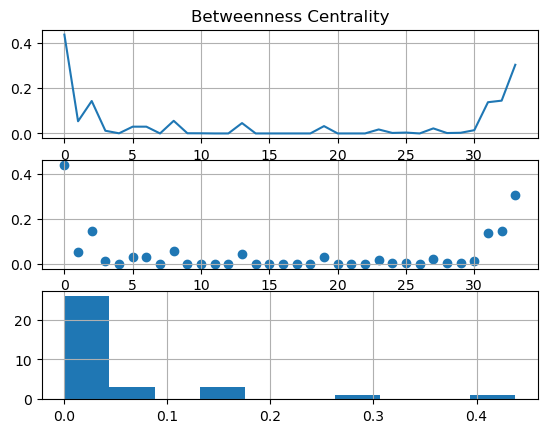

In [65]:
figure, axis = plt.subplots(3, 1)

axis[0].plot(nodes,centralities[:,4])
axis[0].grid()
#axis[0].set_title("degree centralty as plot")
axis[1].scatter(nodes, centralities[:,4])
axis[1].grid()
#axis[1].set_title("degree centralty as scatter plot")
axis[2].hist(centralities[:,4])
axis[2].grid()
axis[0].set_title("Betweenness Centrality")
#axis[1].set_title("degree centralty as histogram")
plt.show()

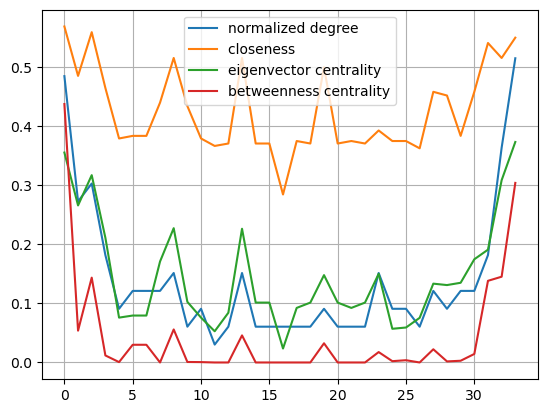

In [74]:
#plt.plot(nodes, centralities[:,0],label = "degree")
plt.plot(nodes, centralities[:,1],label = "normalized degree")
plt.plot(nodes, centralities[:,2],label = "closeness ")
plt.plot(nodes, centralities[:,3],label = "eigenvector centrality")
plt.plot(nodes, centralities[:,4],label = "betweenness centrality")
plt.legend()
plt.grid()
plt.show()

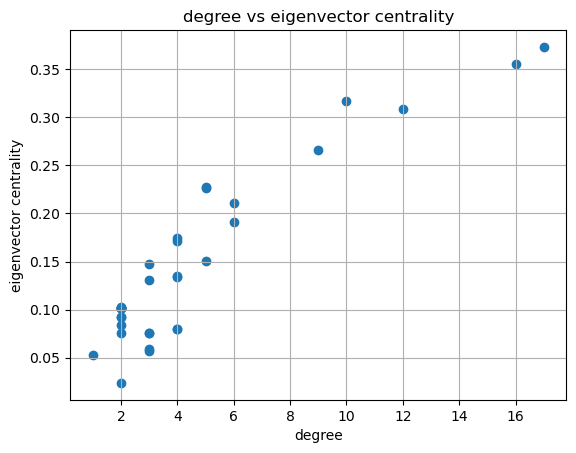

In [63]:
plt.scatter(centralities[:,0],centralities[:,3])
plt.xlabel("degree")
plt.ylabel("eigenvector centrality")
plt.title("degree vs eigenvector centrality")
plt.grid()


## Question 4

In [24]:
average_degree = 4
start_n = 10
end_n = 1001
average_clustering_coefficient = []
average_path_lengths = []
X = [i for i in range(start_n, end_n + 1)]
for i in range(start_n, end_n + 1):
    G = nx.random_regular_graph(average_degree,i)
    average_path_length = nx.average_shortest_path_length(G)
    clustering_coeff = nx.clustering(G)
    avg = 0
    size = 0
    for s in G.nodes:
        avg += clustering_coeff[s]
        size += 1
    avg = avg / size
    average_clustering_coefficient.append(avg)
    average_path_lengths.append(average_path_length)
    if i % 100 == 0:
        print("{0} done".format(i))



    


100 done
200 done
300 done
400 done
500 done
600 done
700 done
800 done
900 done
1000 done


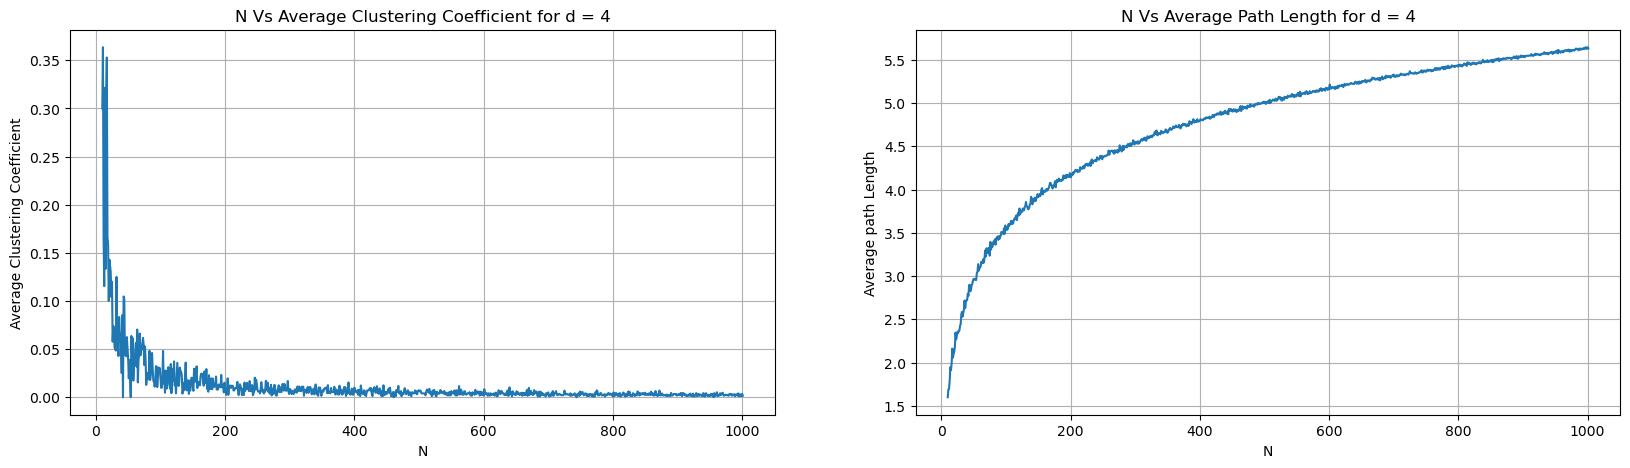

In [62]:
fig = plt.figure(figsize = (20,5))
fig.add_subplot(1,2,1)
plt.plot(X,average_clustering_coefficient)
plt.xlabel("N")
plt.ylabel("Average Clustering Coefficient")
plt.title("N Vs Average Clustering Coefficient for d = 4")
plt.grid()

fig.add_subplot(1,2,2)
plt.plot(X,average_path_lengths)
plt.xlabel("N")
plt.ylabel("Average path Length")
plt.title("N Vs Average Path Length for d = 4")
plt.grid()


In [26]:
average_degree_2 = 8
start_n = 10
end_n = 1001
average_clustering_coefficient_2 = []
average_path_lengths_2 = []
X = [i for i in range(start_n, end_n + 1)]
for i in range(start_n, end_n + 1):
    G = nx.random_regular_graph(average_degree_2,i)
    average_path_length = nx.average_shortest_path_length(G)
    clustering_coeff = nx.clustering(G)
    avg = 0
    size = 0
    for s in G.nodes:
        avg += clustering_coeff[s]
        size += 1
    avg = avg / size
    average_clustering_coefficient_2.append(avg)
    average_path_lengths_2.append(average_path_length)
    if i % 100 == 0:
        print("{0} done".format(i))



100 done
200 done
300 done
400 done
500 done
600 done
700 done
800 done
900 done
1000 done


Text(0.5, 1.0, 'N Vs Average Path Length for d = 8')

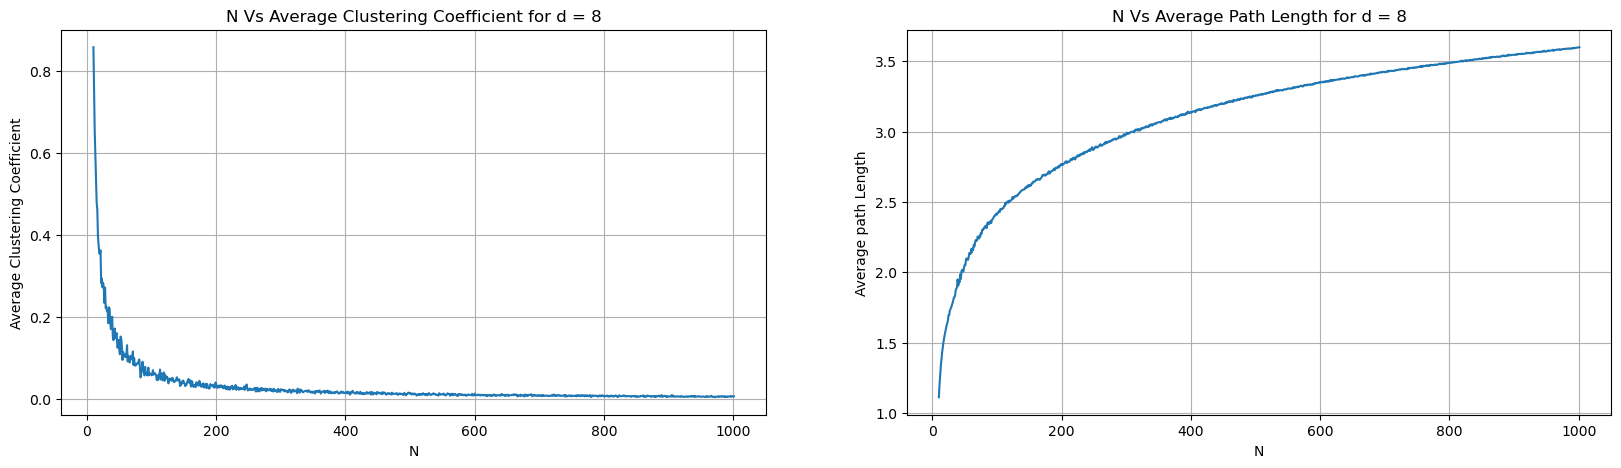

In [61]:
fig = plt.figure(figsize = (20,5))
fig.add_subplot(1,2,1)
plt.plot(X,average_clustering_coefficient_2)
plt.xlabel("N")
plt.ylabel("Average Clustering Coefficient")
plt.title("N Vs Average Clustering Coefficient for d = 8")
plt.grid()

fig.add_subplot(1,2,2)
plt.xlabel("N")
plt.ylabel("Average path Length")
plt.title("N Vs Average Path Length for d = 8")
plt.plot(X,average_path_lengths_2)
plt.grid()
plt.title("N Vs Average Path Length for d = 8")

In [51]:
N1 = 500
avg_degree = [i for i in range(2,31)]
average_clustering_coefficient_3 = []
average_path_distance_3 = []
degree_1 = []
for deg in avg_degree:
    #print(deg)
    if deg % 5 == 0 : 
        print("degree  : {0} and N = {1} ".format(deg, N1))
    G = nx.random_regular_graph(deg,N1)
    if nx.is_connected(G) :
        
        average_path_length = nx.average_shortest_path_length(G)
        clustering_coeff = nx.clustering(G)
        avg = 0
        size = 0
        for s in G.nodes:
            avg += clustering_coeff[s]
            size += 1
        avg = avg / size
        average_clustering_coefficient_3.append(avg)
        average_path_distance_3.append(average_path_length)
        degree_1.append(deg)
    
N2 = 1000
avg_degree = [i for i in range(1,31)]
average_clustering_coefficient_4 = []
average_path_distance_4 = []
degree_2 = []
for deg in avg_degree:
    if deg % 5 == 0 : 
        print("degree  : {0} and N = {1} ".format(deg, N2))
    G = nx.random_regular_graph(deg,N2)
    if nx.is_connected(G) :

        average_path_length = nx.average_shortest_path_length(G)
        clustering_coeff = nx.clustering(G)
        avg = 0
        size = 0
        for s in G.nodes:
            avg += clustering_coeff[s]
            size += 1
        avg = avg / size
        average_clustering_coefficient_4.append(avg)
        average_path_distance_4.append(average_path_length)
        degree_2.append(deg)
    


degree  : 5 and N = 500 
degree  : 10 and N = 500 
degree  : 15 and N = 500 
degree  : 20 and N = 500 
degree  : 25 and N = 500 
degree  : 30 and N = 500 
degree  : 5 and N = 1000 
degree  : 10 and N = 1000 
degree  : 15 and N = 1000 
degree  : 20 and N = 1000 
degree  : 25 and N = 1000 
degree  : 30 and N = 1000 


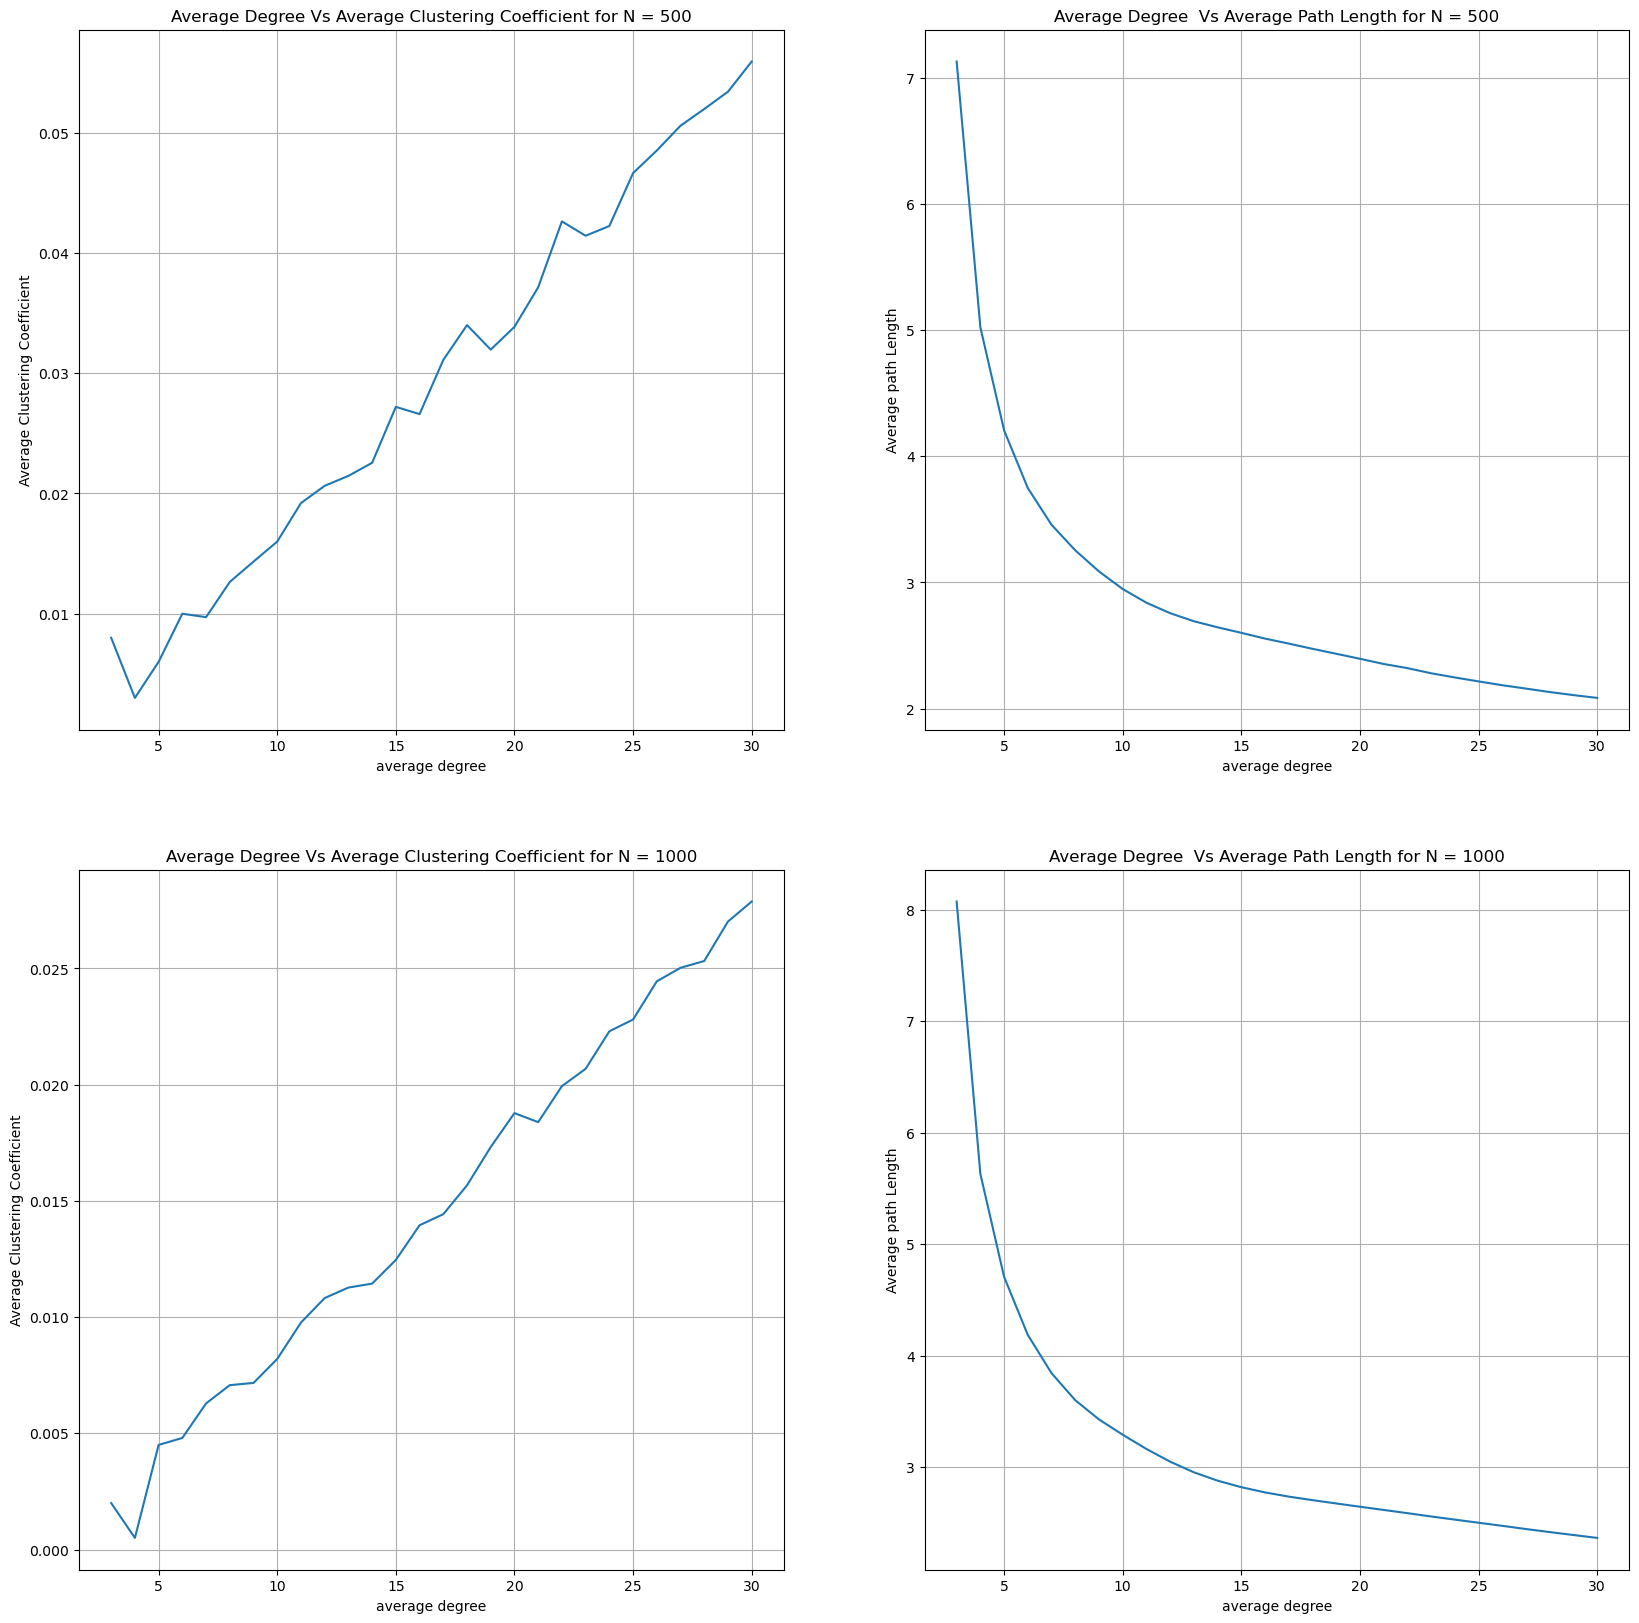

In [60]:
fig = plt.figure(figsize = (20,20))
fig.add_subplot(2,2,1)
plt.plot(degree_1,average_clustering_coefficient_3)
plt.xlabel("average degree")
plt.ylabel("Average Clustering Coefficient")
plt.title("Average Degree Vs Average Clustering Coefficient for N = 500")
plt.grid()

fig.add_subplot(2,2,2)
plt.plot(degree_1,average_path_distance_3)
plt.xlabel("average degree")
plt.ylabel("Average path Length")
plt.title("Average Degree  Vs Average Path Length for N = 500")
plt.grid()

fig.add_subplot(2,2,3)
plt.plot(degree_2,average_clustering_coefficient_4)
plt.xlabel("average degree")
plt.ylabel("Average Clustering Coefficient")
plt.title("Average Degree Vs Average Clustering Coefficient for N = 1000")
plt.grid()

fig.add_subplot(2,2,4)
plt.plot(degree_2,average_path_distance_4)
plt.xlabel("average degree")
plt.ylabel("Average path Length")
plt.title("Average Degree  Vs Average Path Length for N = 1000")
plt.grid()



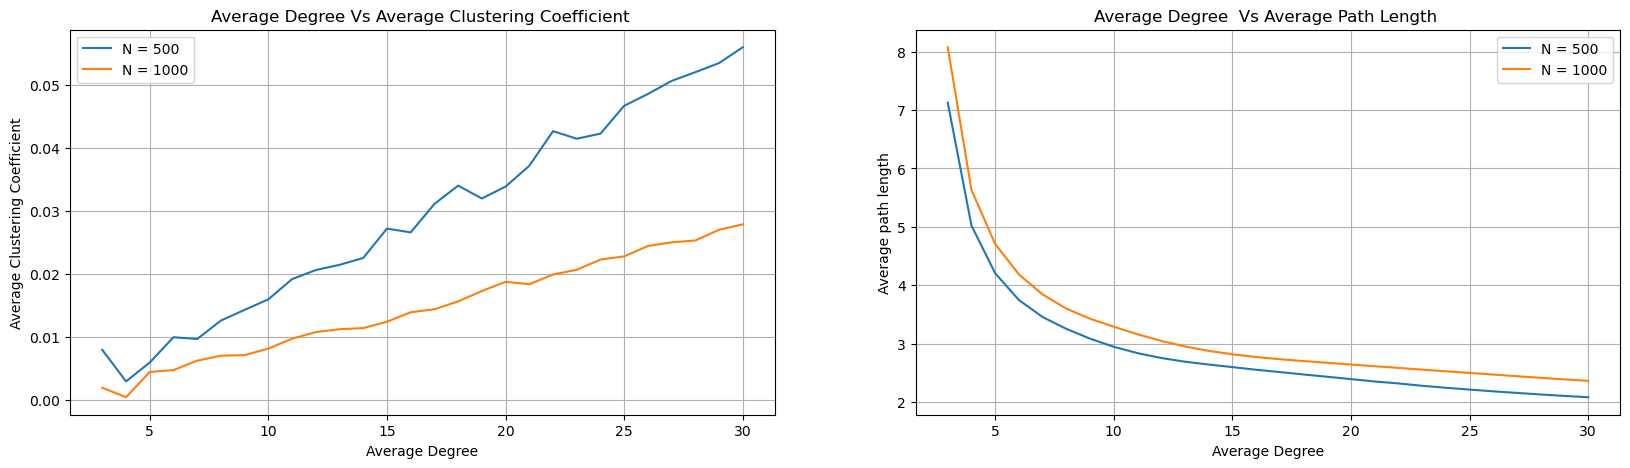

In [59]:
fig = plt.figure(figsize = (20,5))
fig.add_subplot(1,2,1)
plt.plot(degree_2, average_clustering_coefficient_3,label = "N = 500")
plt.plot(degree_1, average_clustering_coefficient_4,label = "N = 1000")
plt.xlabel("Average Degree")
plt.ylabel("Average Clustering Coefficient")
plt.title("Average Degree Vs Average Clustering Coefficient ")
plt.legend()
plt.grid()


fig.add_subplot(1,2,2)
plt.plot(degree_1, average_path_distance_3,label = "N = 500")
plt.plot(degree_2, average_path_distance_4,label = "N = 1000")
plt.xlabel("Average Degree")
plt.ylabel("Average path length")
plt.title("Average Degree  Vs Average Path Length ")
plt.legend()
plt.grid()


